In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
import tensorflow as tf
from scipy.io import wavfile as wav
import warnings
warnings.filterwarnings('ignore')

In [2]:
audio_dataset_path='sound_split/sounds/'
metadata=pd.read_csv('sound_split/Splitmetadata.csv')
mfcc = 70 # öznitelik sayısı
num_labels = 7 # Sınıf sayısı

In [3]:
def features_extractor(filename):
    
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=mfcc)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [4]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_name"]))
    final_class_labels=row["class_name"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

5178it [07:30, 11.49it/s]


In [6]:
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])

X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
model=Sequential()
# 1. hidden layer
model.add(Dense(100,input_shape=(mfcc,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
# 2. hidden layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.4))
# 3. hidden layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [20]:
epochscount = 20
num_batch_size = 32

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=epochscount, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
130/130 [==============================] - 1s 10ms/step - loss: 0.0725 - accuracy: 0.9761 - val_loss: 0.0795 - val_accuracy: 0.9730
Epoch 2/20
130/130 [==============================] - 1s 9ms/step - loss: 0.0903 - accuracy: 0.9686 - val_loss: 0.0778 - val_accuracy: 0.9759
Epoch 3/20
130/130 [==============================] - 1s 10ms/step - loss: 0.0670 - accuracy: 0.9780 - val_loss: 0.0785 - val_accuracy: 0.9807
Epoch 4/20
130/130 [==============================] - 1s 9ms/step - loss: 0.0759 - accuracy: 0.9773 - val_loss: 0.0669 - val_accuracy: 0.9817
Epoch 5/20
130/130 [==============================] - 1s 9ms/step - loss: 0.0685 - accuracy: 0.9804 - val_loss: 0.0631 - val_accuracy: 0.9817
Epoch 6/20
130/130 [==============================] - 1s 9ms/step - loss: 0.0691 - accuracy: 0.9775 - val_loss: 0.0713 - val_accuracy: 0.9788
Epoch 7/20
130/130 [==============================] - 1s 9ms/step - loss: 0.0547 - accuracy: 0.9817 - val_loss: 0.0703 - val_accuracy: 0.9807
Epoc

In [21]:
validation_test_set_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(validation_test_set_accuracy[1])
print(validation_test_set_accuracy[0])

0.9835907220840454
0.060584668070077896


In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


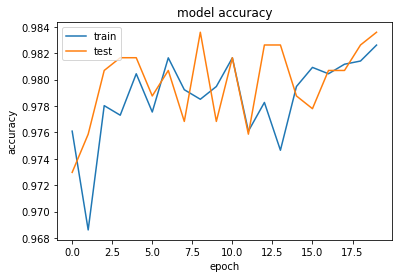

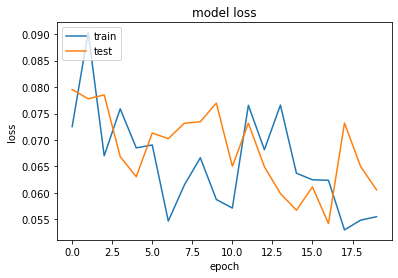

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss


In [13]:
result_classes = ["azerbaycan","kazakca", "uygurca","kirgizca","tatarca","turkmence","ozbekce"]
file_name = "ozbekce"
for i in range(1,11):
    filename="testSound/"+file_name+"_"+str(i)+".wav"
    sound_signal, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=sound_signal, sr=sample_rate, n_mfcc=mfcc)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
    result_array = model.predict(mfccs_scaled_features)
    result = np.argmax(result_array[0])
    print(result_classes[result]) 

FileNotFoundError: [Errno 2] No such file or directory: 'testSound/ozbekce_1.wav'